<h1 align='center'>DATA SCIENCE PROJECT</h1>

<h2 align='center'> <u> <b> CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING ALGORITHM </b></u></h2>

<h3>PROJECT STATEMENT : </h3>

Customer Segmentation is a popular application of unsupervised learning. Using clustering, identify segments of Customers to target the potential user base. They divide customers into groups according to common characteristics like gender, age, interests, and spending habits so they can market to each group effectively. Use K-means clustering and also visualize the gender and age distributions. Then analyze their annual incomes and spending scores.


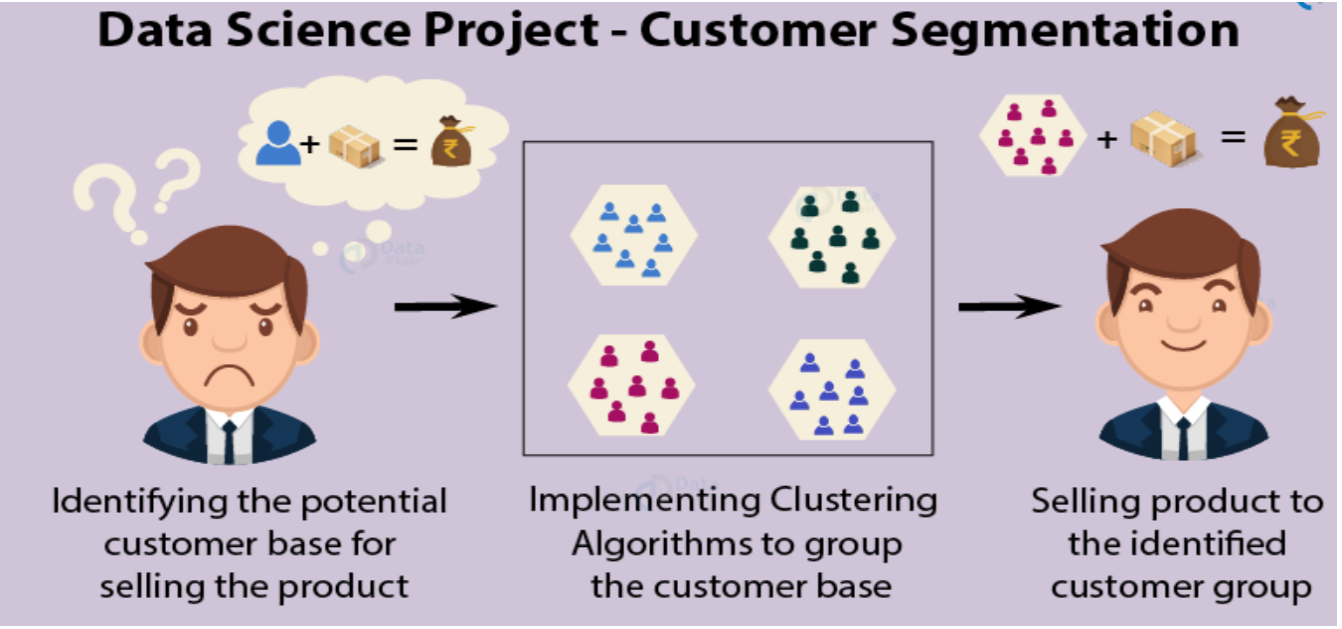

### DATASET :

https://drive.google.com/file/d/19BOhwz52NUY3dg8XErVYglctpr5sjTy4/view

### SOLUTION :

#### TASK #1: IMPORT NECESSARY LIBRARIES

In [1]:
import pandas as pd     
import numpy as np  

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score

#Pandas library is used for dataframe manipulation
#Numpy library is used for numerical analysis
#Seaborn and Matplotlib libraries are used for data visualisation

#Scikit-learn is a free software machine learning library for the Python programming language.
#StandardScaler, normalize libraries are used for scaling data
#KMeans and PCA are the unsupervised machine learning algorithms, that we will be using in this project
#We import these algorithms from the Scikit Library

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

#Setting a theme of choice for future plots

#### TASK #2: IMPORT DATASET & DEVELOP A BASIC UNDERSTANDING OF THE FEATURES

In [3]:
#importing dataset
custdata_df = pd.read_csv('Mall_Customers.csv')
custdata_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


The Imported Dataset 'Mall_Customers.csv' has 200 customer entries and 5 columns.

The 5 columns represent the following attributes:
1. **CustomerID** is the primary key for each customer to distinguish the entries, or identify each customer, but not a feature required for clustering. 


2. The **Gender** is an important criteria to target the customers shopping need. Hence, an important feature.


3. **Age** can be used to categorize the customers according to their spending habits. Usually, middle-aged people have more spending tendency, whereas, the ripe-aged people have a saving tendency. Hence, this can be a useful feature.


4. **Annual Income** might give us an insight on the spending budget of an individual.


5. The **Spending Score** ranges from 1-100. Based on this value, we can understand the marketing tendency of the customer. It's a direct link to the spending habit of the customer and hence, is an important behavioral feature for marketing campaign.

In [4]:
#To retrieve more information on the dataframe.
custdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The datatype of the DataFrame Attributes and the number of non-null entries per attribute retrieved, as above shows, there's probably, no missing entry. However, it's just an overview and requires further visualization.

In [5]:
#To get more statistical insight on the dataframe.
custdata_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


From above, we get the following insight:

1. The average age of the customers lie around 39 years. Max age of a customer is 70 years and Min is 18 years.


2. 75% customers are below 49 yers of age. Most customers(50%) lie in the age limit of about 29 to 49 years.


3. The Annual Income of the customers vary from 137 to 150k dollars, with an average income of about 60000 dollars.


4. Most customers have their annual income within the range of 41k - 78k dollars.

In [6]:
#Gathering some more relevant information

Details of the customer who spends the most, thus, contributing significantly to the mall:

In [7]:
bestcust = custdata_df[custdata_df['Spending Score (1-100)'] == custdata_df['Spending Score (1-100)'].max()]
bestcust

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
11,12,Female,35,19,99


Details of the customer who spends the least, thus, needs to be reahed out to:

In [8]:
leastprofitcust = custdata_df[custdata_df['Spending Score (1-100)'] == custdata_df['Spending Score (1-100)'].min()]
leastprofitcust

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
156,157,Male,37,78,1
158,159,Male,34,78,1


The above list is a very interesting discovery. 

1. These two customers, have a very high income(78k dollars),which is, more than the average annual income of all the customers(60k dollars). 


2. They are middle-aged, around the age of 34 and 37 years, and as shown above, the mean age of the customers is 38 years. hence, they can be expected to shop a lot more than other customers.


3. They haven't spend much (Spending Score = 1) and need to be reached out.

This makes them a high priority target for marketing.

Details of the customers who have the highest income, thus, can be reached for marketing:

In [9]:
richestcust = custdata_df[custdata_df['Annual Income (k$)'] == custdata_df['Annual Income (k$)'].max()]
richestcust

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


Details of the youngest customers, who can be influenced the most to stay for the longest duration, spend more and bring in more future customers:

In [10]:
youngestcust = custdata_df[custdata_df['Age'] == custdata_df['Age'].min()]
youngestcust

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
33,34,Male,18,33,92
65,66,Male,18,48,59
91,92,Male,18,59,41
114,115,Female,18,65,48


#### TASK #3: PRE-PROCESSING THE DATASET

##### CHECK FOR MISSING ELEMENTS :

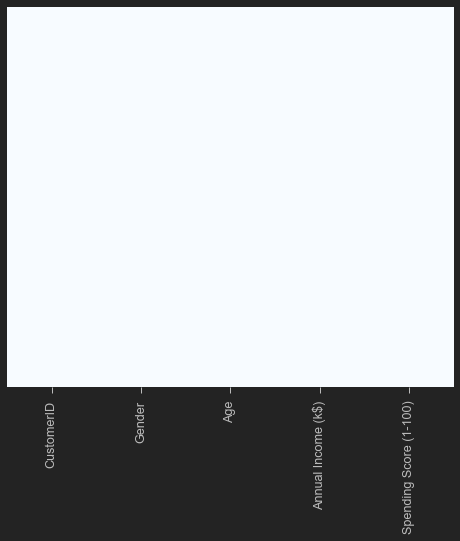

In [11]:
#Generating HeatMap
sns.heatmap(custdata_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

So far as the heatmap is concerned, there's not a lot of missing elements in the dataset. However, there's always a possibility of 1 or 2 missing elements in the dataset, which couldn't be depicted well enough in a heatmap due to the availability of a huge amount of data.

In [12]:
#Generating a summary of null elements, if any.
custdata_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

The above summary ensures, there's no missing entry in the dataset.

##### CLEANING THE DATASET :

The dataset needs to be cleaned, and any unwanted attributes must be discarded, before any further operation takes place.

In [13]:
#Dropping the column Customer_ID, since, it is not a feature required for clustering, as mentioned above.

custdata_df.drop(columns = ['CustomerID'], axis = 1, inplace = True)
custdata_df

#The option axis = 1, ensures that all the rows of the mentioned column(s) are dropped from the dataframe.
#Inplace = True, ensures that the entries get removed from memory too.
#Displaying the new dataframe below.

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


##### PRE-PROCESSING THE DATASET:

While most attribute, as shown above, is of type Integer, Gender is of type object. To visualize the contribution of Gender to the behaviour of the Customer, we need to convert it into Numeric form.

In [14]:
#retrieving information on the Gender attribute in the DataSet.
custdata_df['Gender'].describe()

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object

There's only 2 unique value of Gender Attribute. However, we need to identify these values for further processing.

In [15]:
#retrieving information on the unique values of Gender in the DataSet.
custdata_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Thus, the binary values of the Gender Attribute are: 'Male' and 'Female'.

We assign them with the following numerical values:
1 for Male, 
2 for Female

In [16]:
#Replacing the Gender Objects with Integer Values, converting the attribute datatype to Integer and re-listing the dataset.

custdata_df.loc[(custdata_df['Gender'] == 'Male'), 'Gender'] = 1
custdata_df.loc[(custdata_df['Gender'] == 'Female'), 'Gender'] = 2

custdata_df['Gender'] = pd.to_numeric(custdata_df['Gender'])

custdata_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40
...,...,...,...,...
195,2,35,120,79
196,2,45,126,28
197,1,32,126,74
198,1,32,137,18


In [17]:
#Re-checking the datatypes of the attributes of the pr-processed dataframe:
custdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


#### TASK #4: VISUALIZING THE DATASET 

In [18]:
#Fetching the no. of data entries for future operations.
n = len(custdata_df.columns)
n

4

In [19]:
#Checking the Columns or Attributes of the Dataset
custdata_df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

###### Probability Distribution Plot

Inorder to visualize the dataset, and get a rough estimate of their behaviour, we need to check the Probability Density of each of the Attributes with respect to one another.

For this, we use the distribution plot of the Seaborn Library. It combines matplot.lib histogram plot with seaborn KDE (Kernel Density Estimate) Plot, to enable us to visualize the Probability Density of the concerned variables.

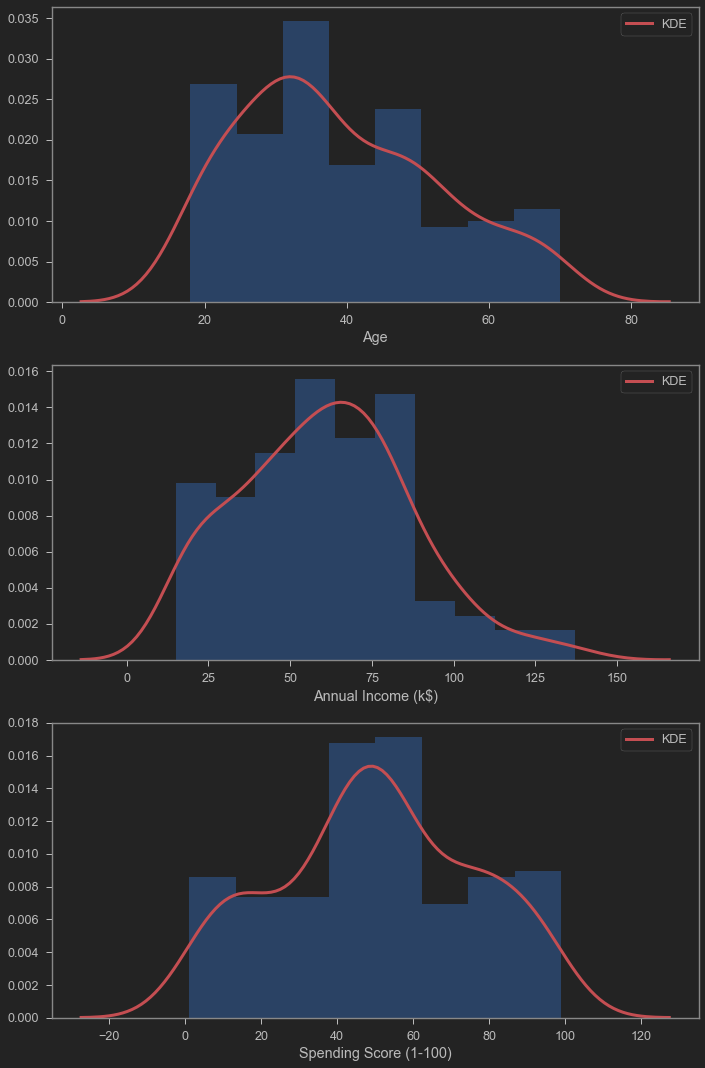

In [20]:
#Plotting the Probability Distribution Graph to get a Rough Estimate on the Data
#Plotting for all attributes except Gender, which is visualized later.

plt.figure(figsize = (10, 20))

for i in range(1, n):
    plt.subplot(n, 1, i+1)
    sns.distplot(custdata_df[custdata_df.columns[i]], kde_kws = {'color': 'r', 'lw': 3, 'label': 'KDE'}, hist_kws = {'color': 'b'})
    
plt.tight_layout()

From the above KDE plot, we can make the following assumptions:

1. Most of the customers are around the age of 38.


2. The Probability Density Curve confirms that there are more young customers than old. 


3. Among the middle-aged customers, there's an increased no. of customers at the age of approximately, 38 and 45.


4. The Annual Income curve shows, most customers have an annual income of less than 75k dollars.


5. The mean Annual ncome of the customers can be considered around 60k dollars.


6. Only a few customers have very low(below 20), or, very high(above 80) spending score.


7. Most customers have a spending score of around 40 - 60 %. 

###### Visualizing Attribute 'Gender'

To visualize the distribution of Customers, with respect to the Gender Attribute, we plot the Customers on basis of their Gender in separate bar and pie-charts as shown below.

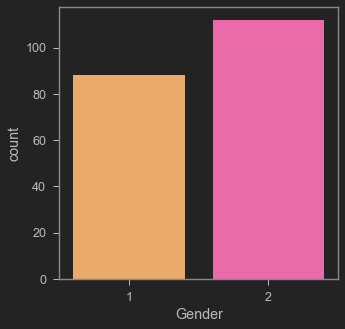

In [21]:
#visualizing the contribution of Gender.

plt.figure(figsize = (5, 5))
ax = sns.countplot(x="Gender", data=custdata_df, palette='spring_r')

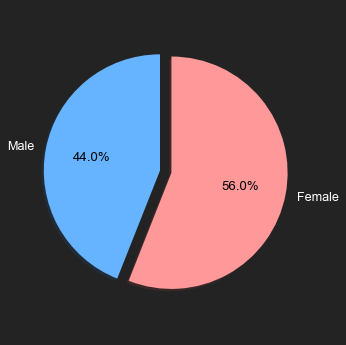

In [22]:
# Visualizing the gender data in piechart format

labels = ['Male', 'Female']
sizes = [custdata_df.loc[(custdata_df['Gender'] == 1), 'Gender'].count(), custdata_df.loc[(custdata_df['Gender'] == 2), 'Gender'].count()]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)
                         
fig1, ax1 = plt.subplots(figsize = (5, 5))
patches, texts, autotexts = ax1.pie(sizes, labels=labels, explode=explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90)

for text in texts:
    text.set_color('white')

for autotext in autotexts:
    autotext.set_color('black')
    
ax1.axis('equal')  

plt.tight_layout()
plt.show()

From the above barplot and piechart, we see that a majority of customers i.e. about 56% (more than 100) are Female, while the rest are male.

###### Co - relation Matrix

Inorder to draw any further conclusion, we need to check out the corelation between the various attributes, and find out, how they relate to each other, how much they affect each other, and which attribute has the most effect on which and least effect on which. Once, the corelation has been established, only then, can we decide our way of approach:

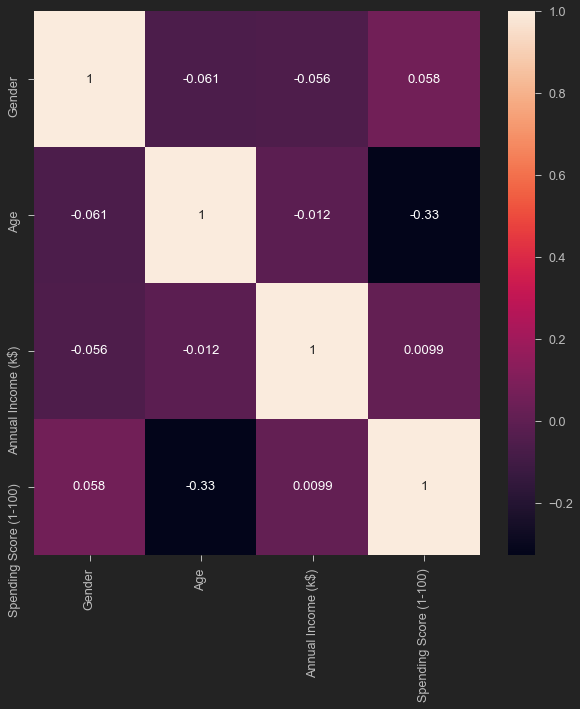

In [23]:
#Finding the Corelation among the data and Plotting them on a heatmap:

corelation = custdata_df.corr()
f, ax = plt.subplots(figsize = (10, 10))    #SEtting the figure size enables us to better visualize the heatmap values.
sns.heatmap(corelation, annot = True)

As displayed above, the attributes doesn't exhibit much behavioral corelation.

###### Skewness Visualization

We use boxplot to check for any skewness in the attributes of the dataset and also to check the concentration of customers for each attribute along with the range. Since, there's no corelation among the attributes, hence, we establish the plots for individual attributes only.

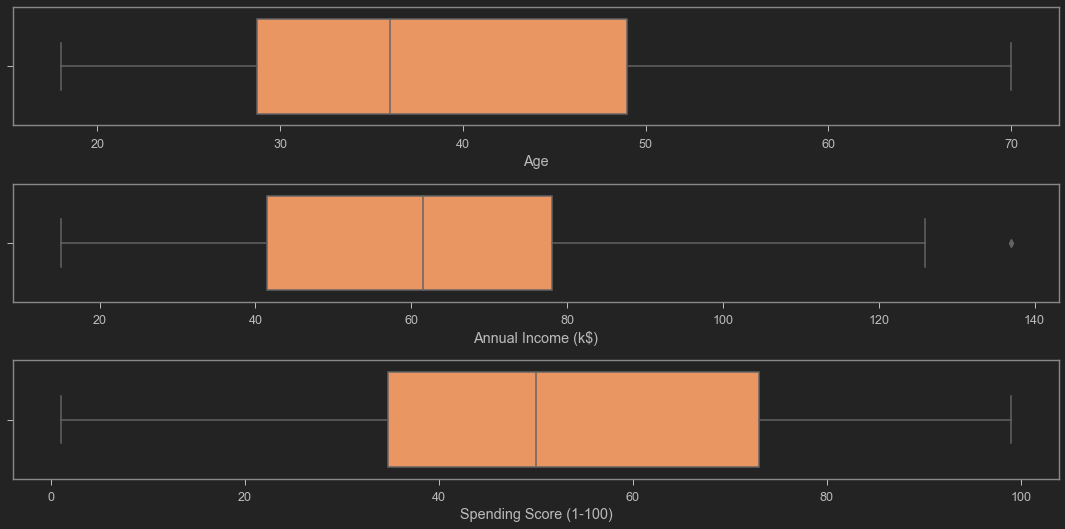

In [24]:
plt.figure(figsize = (15, 10))

for i in range(1, n):
    plt.subplot(n, 1, i+1)
    sns.boxplot(x = custdata_df[custdata_df.columns[i]], data = custdata_df, color = 'y')
    
plt.tight_layout()

#### TASK #5: FIND THE OPTIMAL NUMBER OF CLUSTERS

###### Scaling the Data

In [25]:
scaler = StandardScaler()

custdata_df_scaled = scaler.fit_transform(custdata_df.iloc[:,1:])
custdata_df_scaled.shape

(200, 3)

In [26]:
custdata_df_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

##### Understanding Elbow Method

 The elbow method is a heuristic method used in determining the number of clusters in a data set. The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.
 
 Using the "elbow" or "knee of a curve" as a cutoff point is a common heuristic in mathematical optimization to choose a point where diminishing returns are no longer worth the additional cost. In clustering, this means one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. 

###### Implementing Elbow Method

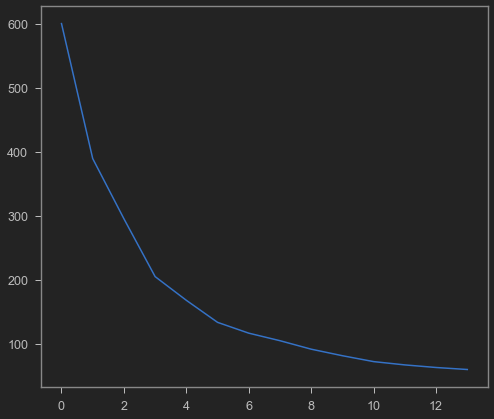

In [27]:
#creating a list to store the values of WCSS(Within Cluster Sum of Squares)
scores_WCSS = []

#for loop to calculate WCSS value for clusters ranging from 1 to 20
for i in range(1,15):
    kmeans = KMeans (n_clusters = i)
    kmeans.fit (custdata_df_scaled)
    scores_WCSS.append(kmeans.inertia_)

#Displaying WCSS value against Cluster number in a line plot,
#to determine the optimum number of Clusters for the Dataset using Elbow Method.
plt.plot(scores_WCSS, 'bx-')

From the Elbow Method the optimum number of clusters('k') for KMeans can be estimated to be 5. However, let's verify it further.

###### Understanding Silhouette Method

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

##### Implementing Silhouette Method

For n_clusters = 2 The average silhouette_score is : 0.33547192894004574
For n_clusters = 3 The average silhouette_score is : 0.35880977401117803
For n_clusters = 4 The average silhouette_score is : 0.4039582785148566
For n_clusters = 5 The average silhouette_score is : 0.41664341513732767
For n_clusters = 6 The average silhouette_score is : 0.42742814991580175
For n_clusters = 7 The average silhouette_score is : 0.4188056949620008
For n_clusters = 8 The average silhouette_score is : 0.40694842797445224
For n_clusters = 9 The average silhouette_score is : 0.4207420987392564
For n_clusters = 10 The average silhouette_score is : 0.3991914449618633


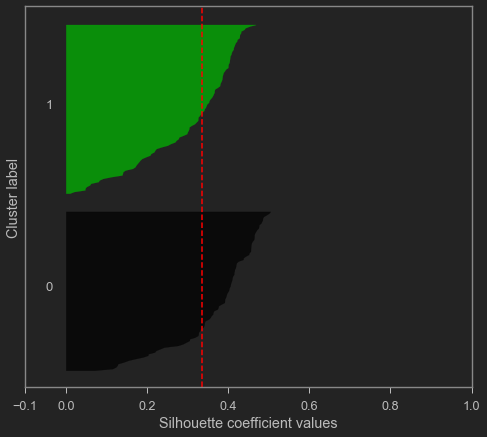

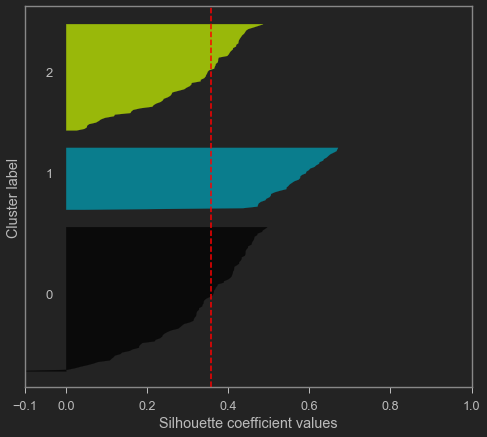

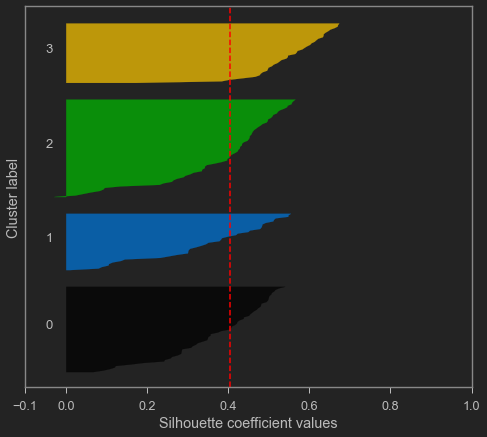

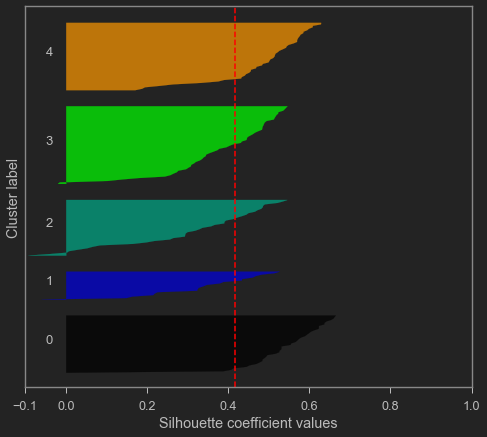

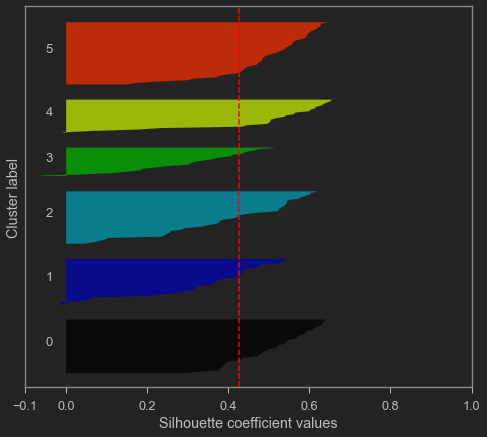

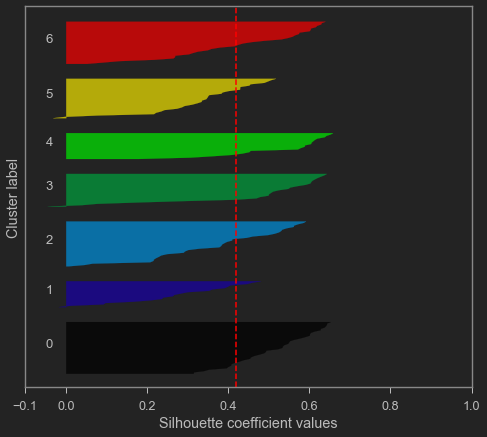

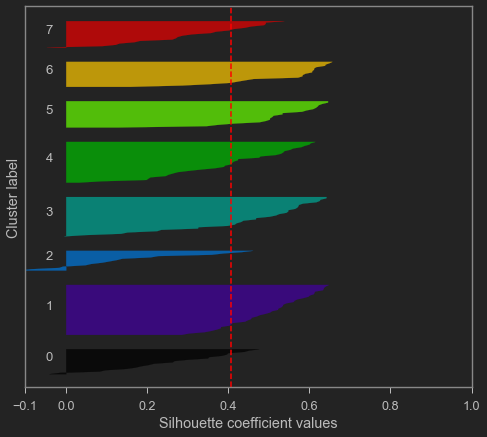

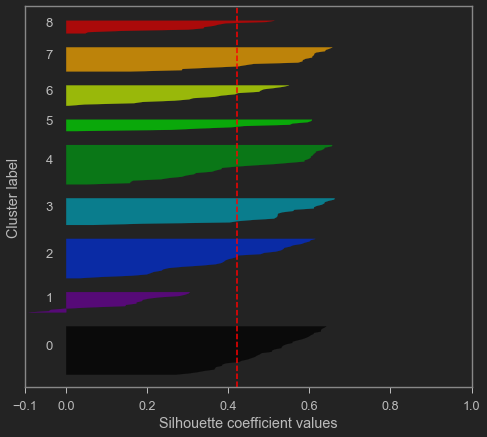

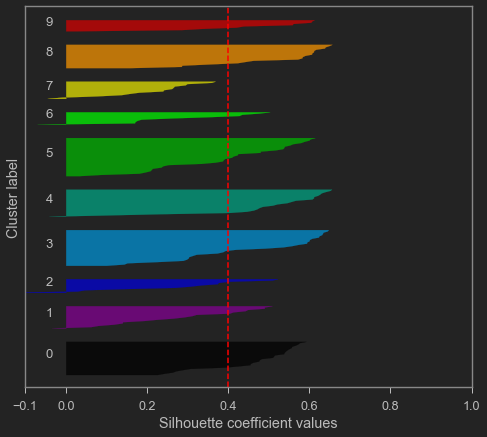

In [28]:
#creating a list to store the values of Silhouette Average Score and the Calinski Harabasz Score.
scores_silhouette = []
scores_CH = []

#for loop to calculate Silhouettte Coefficient value for clusters ranging from 1 to 10
for i in range(2, 11):
    fig, ax1 = plt.subplots(1, 1)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, 
    # to demarcate them clearly.
    ax1.set_ylim([0, len(custdata_df_scaled) + (i + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=i, random_state=10)
    cluster_labels = kmeans.fit_predict(custdata_df_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    scores_silhouette.append(silhouette_score(custdata_df_scaled, cluster_labels))
    scores_CH.append(calinski_harabasz_score(custdata_df_scaled, cluster_labels))
    print("For n_clusters =", i, "The average silhouette_score is :", scores_silhouette[i-2])
    
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(custdata_df_scaled, cluster_labels)
    
    y_lower = 10
    for j in range(i):
        # Aggregate the silhouette scores for samples belonging to cluster j, and sort them
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        jth_cluster_silhouette_values.sort()

        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.nipy_spectral(float(j) / i)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, jth_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=scores_silhouette[i-2], color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

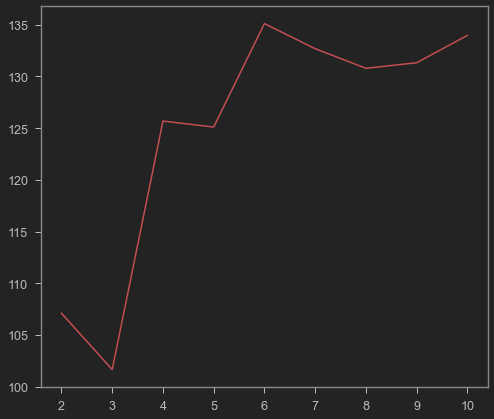

In [29]:
plt.plot(np.arange(2, 11), scores_CH, 'rx-')

Here, the silhouette analysis is used to choose an optimal value for k clusters. The average silhouette_score is max for k=6 (i.e. 0.427) and also, the Calinski Harabasz Score shows peak at k = 6. 

In conclusion to the results obtained from Elbow Method (k = 5), Silhouette Method - Average Silhoutte Score (peak at k = 6), and Calinski Harabsz Score (prominebnt peak at k=6), we select the optimal no. of clusters(k) = 6.

#### TASK #6: APPLY K-MEANS ALGORITHM

##### K-Means Algorithm

Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different.

Kmeans algorithm is an iterative clustering algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

##### Implementing K-Means

In [30]:
# using KMeans module from scikit.cluster module
# Kmeans.fit method trains the model and fits all the data points into some cluster
# As derived from above, we have chosen, the no. of clusters = 6
# labels display the cluster labels associated with each data point.

kmeans = KMeans(n_clusters=6, init='k-means++', random_state = None)
kmeans.fit(custdata_df_scaled)
labels = kmeans.labels_
labels

array([0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2, 0, 4, 0,
       4, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 3, 1, 3, 5, 3, 5, 3, 5, 3,
       1, 3, 5, 3, 5, 3, 1, 3, 5, 3, 1, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 2, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3])

Model has been trained. Now, we can take a look at the clusters or the segments of Customers formed. However, it needs some further processing so that the data can be interpreted easily.

In [31]:
# cluster_centers_ is an attribute of the scikit k-means module
# it has all the cluster centroids stored in it in an array format.
# To take a look at the dimension of the cluster centers, we use cluster_centers_.shape
# The number of rows indicate the number of clusters, and 
# the number of columns indicate the number of features/attribute per cluster.

kmeans.cluster_centers_.shape

(6, 3)

Now, to realize the cluster with respect to given dataset, we create a dataframe that contains all the central clusters and give the headers for the column using the column header of custdata_df.

In [32]:
#Displaying clusters dataframe with respect to preciously scaled data.
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[custdata_df.columns[1:]])
cluster_centers

,Age,Annual Income (k$),Spending Score (1-100)
0,-0.976027,-1.325497,1.037183
1,-0.873098,-0.113785,-0.093580
2,1.254721,-0.240213,-0.043998
3,-0.441917,0.991583,1.239503
4,0.478957,-1.308230,-1.196444
5,0.221716,1.083225,-1.290052


The above scaled data needs to be reverse-scaled so that the clusters can be compared to or visualized with respect to the given dataset.

In [33]:
# Using inverse_transform method from scikit

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[custdata_df.columns[1:]])
cluster_centers

,Age,Annual Income (k$),Spending Score (1-100)
0,25.250000,25.833333,76.916667
1,26.684211,57.578947,47.789474
2,56.333333,54.266667,49.066667
3,32.692308,86.538462,82.128205
4,45.523810,26.285714,19.380952
5,41.939394,88.939394,16.969697


The cluster_centers dataframe stores the cluster centroids. The above table displays these centroid and the value stored for each of the feature. The feature value stored in each case is the mean of that particular feature for that cluster. Hence, we can draw the following conclusions abut the above clusters *(listed features may not be in order with the data in table)*:

-  **Young Moderate Spenders:** Customers belonging to this group are mostly the young individuals (mean around 25). Their annual income and spending score is close to the mean annual income(60) and the mean spending score(50) that was observed earlier with respect to the non - clustered set of data. This group needs further observations for any other remark.


-  **Middle-aged Moderate Spenders:** Customers belonging to this group are mostly the people in their middle adulthood or older(above 55 year old) individuals. Their annual income (near 60) and spending score (near 50) needs further speculation as they are close to the mean values for the entire dataset.

 
-  **Young Spendthrifts:** Customers belonging to this group are once again the young individuals(around 25). However, their annual income is distincltly low (below 30k) and spending score is distinctly high (above 70k). These group of customers can be designated as frequent buyers, but they can't be expected to shop much in the high price range.


-  **Prime Customers:** Customers belonging to this group belong to their middle-age or early adulthood(30 - 40 years old). Both their annual income (above 80k) and spending score (above 80) are distinctly high. These are the prime customers of the mall. They are the main revenue generators.


-  **Low Budget Methodical Customers:** Customers belonging to this group belong to their middle-age(around 45 years old). Both their annual income (below 30k) and spending score (below 40) are distincltly low. These customers are neither frequent shoppers, nor can they afford to pay much. They are definitely, the thoughtful buyers, who use their experience and better judgement for every single penny spent.


-  **Middle-aged, High Earner, Low Spender:** Customers belonging to this group also belong to their early middle-age (around 40s). Their annual income is distinctively high (above 80k). However, the spending score is quite low (below 30). They probably prefer some other mall. These customers can be converted into the Prime Customers with proper marketing campaign.

##### Checking out the cluster labels associated with the data points.

In [34]:
#fnding no. of data points associated with the labels and the range of the labels
labels.shape

(200,)

In [35]:
num_clusters = labels.max()
num_clusters 

5

In [36]:
labels.min()

0

##### Fitting data to the trained model.

In [37]:
#Associating each of the 200 data points to 1 of the 6 cluster labels(0-6).

y_kmeans = kmeans.fit_predict(custdata_df_scaled)
y_kmeans

array([4, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2, 4, 3, 4,
       3, 4, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 5, 1, 5, 1, 5, 1,
       0, 1, 5, 1, 5, 1, 0, 1, 5, 1, 0, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 2, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1])

Now that each data point has been associated with one of the cluster, we take the original dataframe, and to it, we add an additional column representing the cluster_label of the data called as "Cluster". The gender, is also taken into cosideration, now.

In [38]:
custdata_df_cluster = pd.concat([custdata_df, pd.DataFrame({'Cluster': labels})], axis =1)
custdata_df_cluster.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,2,20,16,6,4
3,2,23,16,77,0
4,2,31,17,40,4


Now, for each of the above columns, histograms of all the 6 clusters are plotted so that a thorough insight can be gained into the dataset.

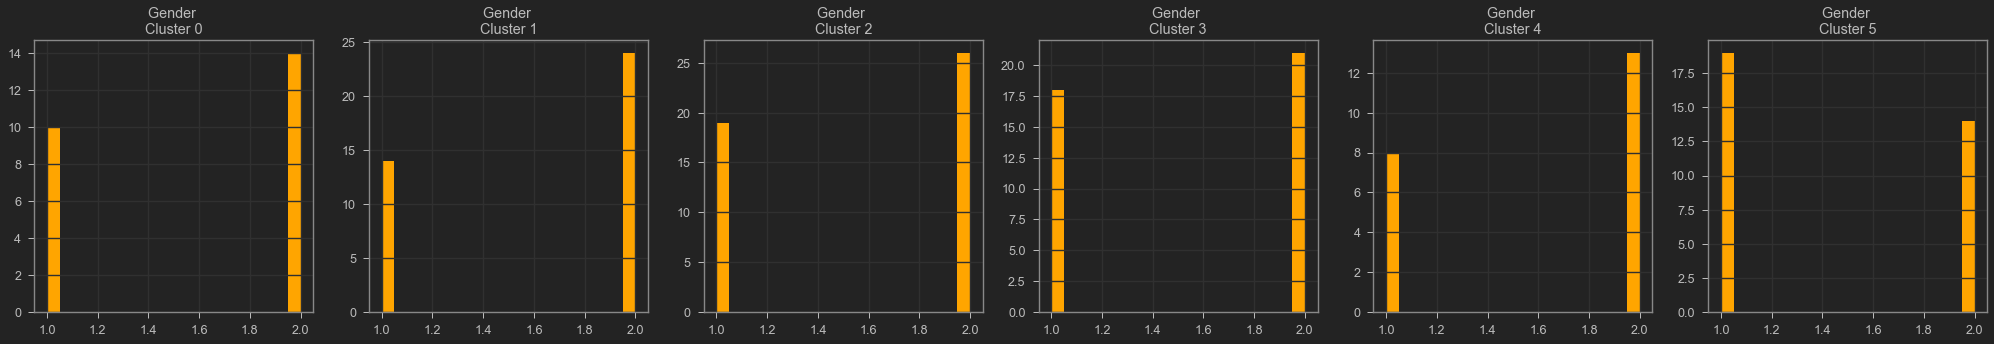

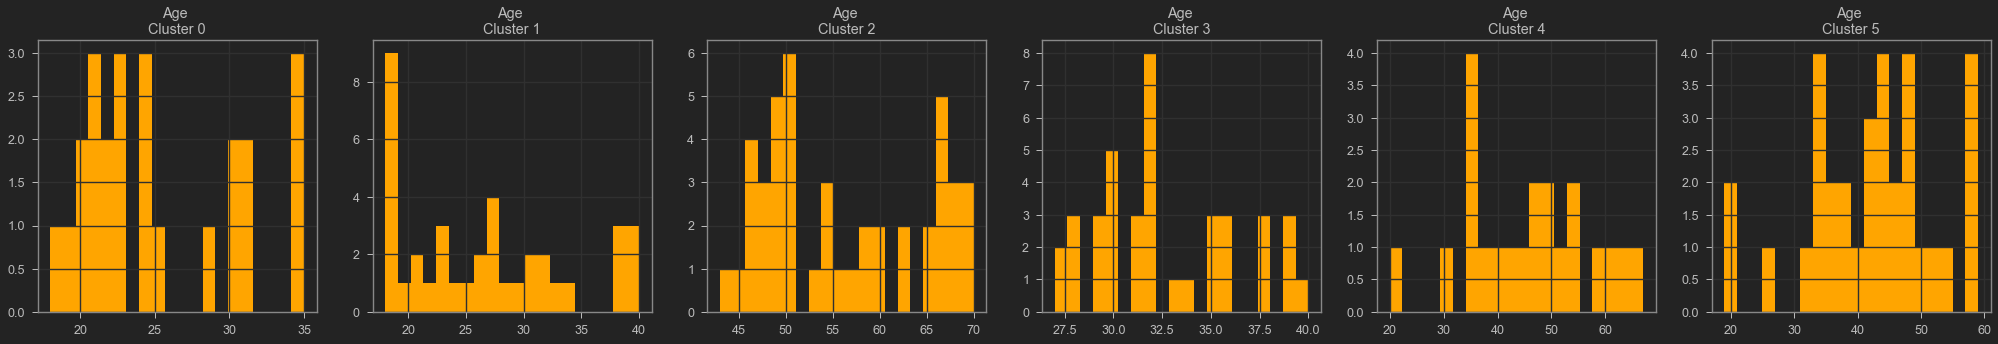

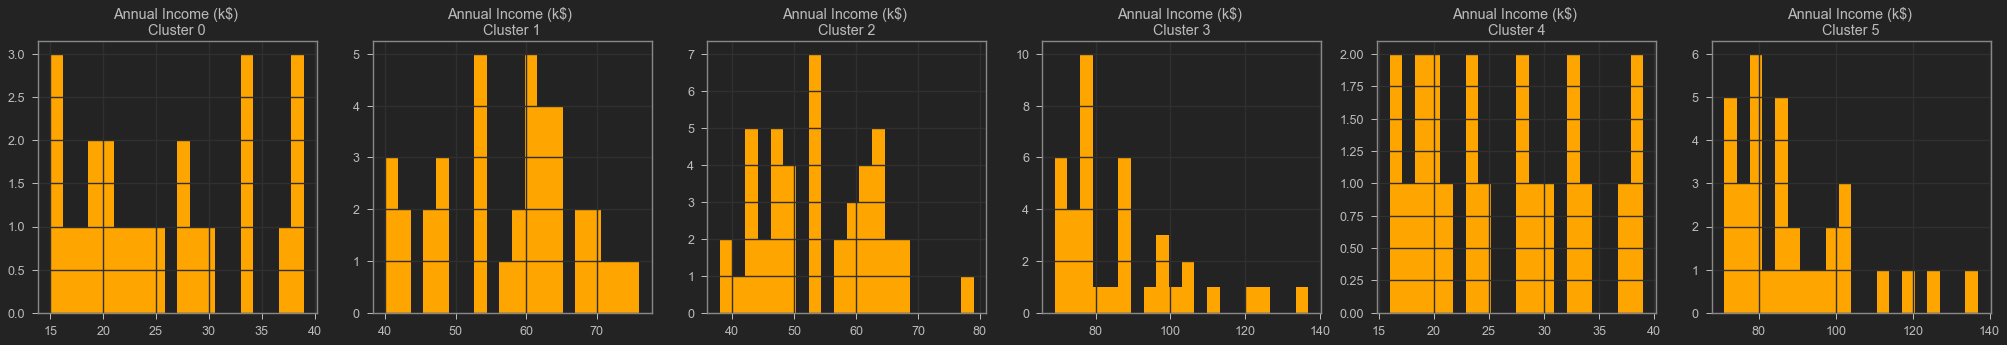

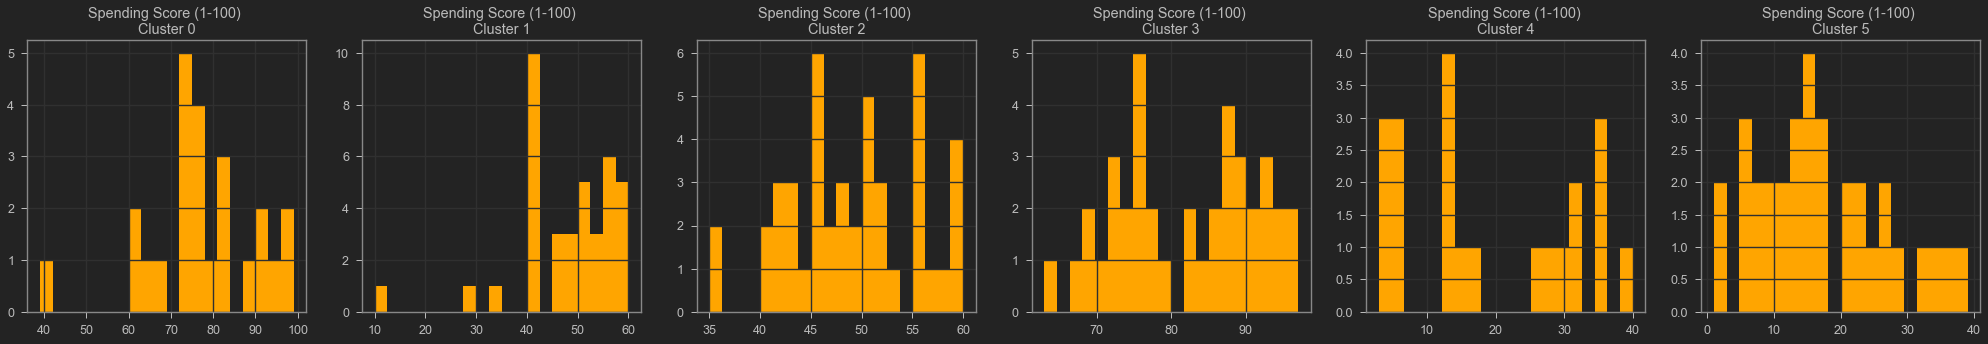

In [39]:
for i in custdata_df.columns:
    plt.figure(figsize = (35, 5))
    
    for j in range(num_clusters+1):
        plt.subplot(1, num_clusters+1, j+1)
        cluster = custdata_df_cluster[custdata_df_cluster['Cluster'] == j]
        cluster[i].hist(bins = 20, color = 'orange')
        plt.title ('{} \nCluster {}'.format(i, j))
    
    plt.show()

Using the graphical plot above, we can further analyze the identified clusters *(listed features may not be in order with the data in graph)*:

-  **Young Moderate Spenders:** The graph plot validates that these customers are mostly the young individuals (around 20 - 40), and includes a lot of teenagers. Though there's a significant group of male customers, the no. of female shoppers are more(approx. 12 units more than male). Their annual income, is quite diverse, however, the graph indicates they range from 40k to beyond 70k, with majority of them having an income within 55-70k. Their spending score, however, is quite low, with majority customers lying in the zone of 40 - 60. Clearly, these customers can be made to shop more. Keeping in mind their low age, they can be targeted towards impulse buying of products needed by the young generation.


-  **Middle-aged Moderate Spenders:** In contrast to the note made earlier, the graph establishes these customers as a diverse group of people, from their mid-40s to early 70s. They can be guessed as individuals with family. Once again, there are more females than male customers (about 9 units). Their annual income lies in the range of approximately 40-70k with a spectacular high frequency in the region of 55k and some exceptions. They can be safely put in the category of individuals with stable income. They have a mediocre spending score, with notable highs in the range of 45 - 60. These group of customers are careful spenders, and probably, people with family.


-  **Young Spendthrifts:** The graph clearly puts these group of customers in their early adulthood (around 20 -35). A significnat amount of them are teenagers. There isn't a lot of difference between the number of male and female customers, though the female customers are definitely, a bit more (about 2.5 units). Their annual income is below the average annual income of the dataset (below 40k). Their spending score, the other hand, is quite high(mostly, above 50). Hence, it can be presumed that these group of people are probably college goers, or, people with new jobs, or promotions. Their annual income vs spending score ratio, definitely, puts them in the list of impulse buyers. The mall must target this group to bring in more customers. Also, they are an asset to the mall who can be expected to buy costlier products in the future.


-  **Prime Customers:** Once again, customers belonging to this group are in mid-age i.e. late twenties to early forties. Also, they are almost evenly distributed gender-wise(only, a negligible 2.5 units more male than female). However, their annual income is significantly higher (mostly above 70k) and spending scores are also, distincltly high (above 60). As noted earlier, these are the prime customers of the mall that bring in most of the revenue.


-  **Low Budget Methodical Customers:** Customers of this group belong to diverse age, though, a notable high can be noted in the region of mid-thirties. Once again, there are more females than male customers (about 5 units). The graph justifies the earlier speculations, that these group have both low annual income (below 40k) and low spending score (below 40). They are customers with low - budget and methodical purchasing behaviour.


-  **Middle-aged, High Earner, Low Spender:** Once again, we come across a group of individuals in the diverse age-group. However, most of them are in their late thirties to late fifties. This is the only group with more male (3.5 units more) than female customers. Their annual income is the highest (above 70k) among all other groups. However, the spending score is quite low(below 40). They probably prefer some other mall or are new customers. These customers are definitely the wrthy target of a marketing campaign.



#### Task #7: Dimensionality Reduction

##### Applying Principal Component Analysis (PCA)

PCA is an unsupervised Machine Learning Algorithm. It is a statistical tool used in exploratory data analysis and in predictive modeling. It is commonly used for dimensionality reduction by projecting each data point onto only the first several principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. 

The first principal component of a set of data points in a multidimensional space is the direction of a line that best fits the data, in that it minimizes the variance of the projected data or minimizes the sum of squared distances from points to the line. Each subsequent principal component[i] is a direction of a line that minimizes the sum of squared distances and is orthogonal to the first i-1  principal components. Principal component analysis or PCA is the process of finding or using such components.

In [40]:
#obtain the principal component
pca = PCA (n_components = 2)
principal_cmp = pca.fit_transform(custdata_df_scaled)
principal_cmp

array([[-6.15720019e-01, -1.76348088e+00],
       [-1.66579271e+00, -1.82074695e+00],
       [ 3.37861909e-01, -1.67479894e+00],
       [-1.45657325e+00, -1.77242992e+00],
       [-3.84652078e-02, -1.66274012e+00],
       [-1.48168526e+00, -1.73500173e+00],
       [ 1.09461665e+00, -1.56610230e+00],
       [-1.92630736e+00, -1.72111049e+00],
       [ 2.64517786e+00, -1.46084721e+00],
       [-9.70130513e-01, -1.63558108e+00],
       [ 2.49568861e+00, -1.47048914e+00],
       [-1.45688256e+00, -1.66436050e+00],
       [ 2.01018729e+00, -1.45329897e+00],
       [-1.41321072e+00, -1.61776746e+00],
       [ 1.00042965e+00, -1.49579176e+00],
       [-1.56943170e+00, -1.62502669e+00],
       [ 2.94060318e-01, -1.49425585e+00],
       [-1.31624924e+00, -1.57216383e+00],
       [ 1.31669910e+00, -1.37243404e+00],
       [-1.43679899e+00, -1.51039469e+00],
       [ 2.88561175e-01, -1.37988135e+00],
       [-1.26018513e+00, -1.45723906e+00],
       [ 1.66684303e+00, -1.27396755e+00],
       [-9.

The above model took all the 3 features and transformed them int 2 components. We now transform the dataset obtained into a dataframe.

In [41]:
# Naming the components as 'pca1' and 'pca2'
pca_df = pd.DataFrame(data = principal_cmp, columns = ['pca1', 'pca2'])
pca_df

,pca1,pca2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740
...,...,...
195,-1.093705,2.215577
196,0.800448,2.540748
197,-1.119709,2.445169
198,0.395411,2.946665


The above datapoints have been associated with their pca value. Now, they need to be associated with the cluster labels, that had been obtained previously.

In [42]:
#Associating the dataframe woth the cluster labels, by adding another column, as before.

pca_df = pd.concat([pca_df, pd.DataFrame({'Cluster': labels})], axis =1)
pca_df.head()

,pca1,pca2,Cluster
0,-0.615720,-1.763481,0
1,-1.665793,-1.820747,0
2,0.337862,-1.674799,4
3,-1.456573,-1.772430,0
4,-0.038465,-1.662740,4


#### Task #8: Presenting the Final Result

##### Plotting the clusters in a 2-D graph:

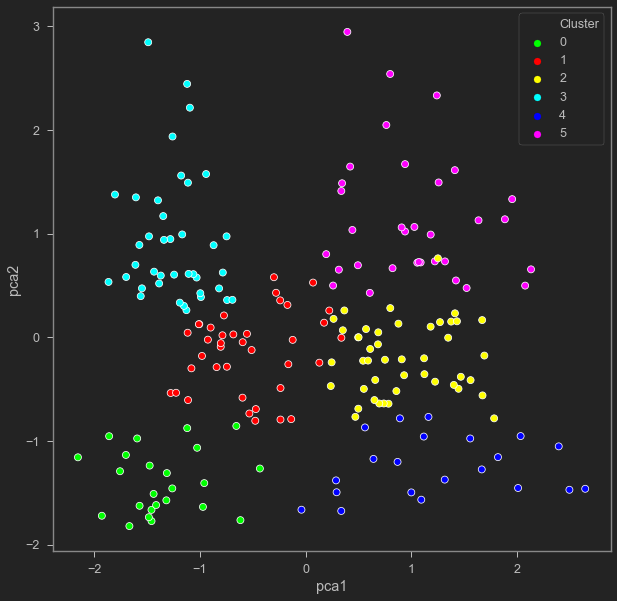

In [46]:
#Visualizing the result in a 2d-scatter plot 
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = "Cluster", data = pca_df, palette = ['lime', 'red', 'yellow', 'cyan', 'blue', 'magenta'])
plt.show()

### Conclusion:

Using the graphical plot above, we can further analyze the identified clusters *(listed features may not be in order with the data in graph)*:

-  **Young Moderate Spenders:** The customers with both pca1 nad pca2 value in range of -1 to +1. These were the young customers with moderate buying tendency, and the target for impulse buying of products needed by the young generation.


-  **Middle-aged Moderate Spenders:** The customers with positive pca1 and pca2 value in range of -1 to +1.These were the middle-aged customers with stable or high income, and a mediocre spending score. They are the cautious buyers.


-  **Young Spendthrifts:** The customers with negative pca1 and negative pca2 value. These were the customers in their early adulthood, with below average annual income and high spending score. They are the impulse buyers.


-  **Prime Customers:** The customers with negative pca1 and positive pca2 value. These were the middle-aged customers with significantly high annual income as well as spending scores. These were the group of prime customers of the mall who bring in most of the revenue.


-  **Low Budget Methodical Customers:** The customers with positive pca1 and negative pca2 value. These were the diverse-aged with low annual income as well as low spending score. They are careful spenders.


-  **Middle-aged, High Earner, Low Spender:** The customers with positive pca1 and positive pca2 value. These were also the diverse-aged individuals. However, it was the only male majority group with the highest annual income among all other groups but low spending scores. They aren't frequent buyers, but are definitely, a good target for the marketing campaign.

<h1 align = 'center'>Thank You.</h1>